# Importing Libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline

### Removing the ID column

In [3]:
df = pd.read_csv('iris.csv', usecols=lambda column: column != 'Id') #to drop the ID column

### Changing the names of columns

In [4]:
new_col = {'SepalLengthCm':'Sepal_L','SepalWidthCm':'Sepal_W','PetalLengthCm':'Petal_L','PetalWidthCm':'Petal_W','Species':'S'}
df=df.rename(columns=new_col) #to rename the column names

# Analysing and Visualizing the Data

In [5]:
df.head()

,Sepal_L,Sepal_W,Petal_L,Petal_W,S
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,Sepal_L,Sepal_W,Petal_L,Petal_W
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

### No null values

In [8]:
df.isnull().sum()

Sepal_L    0
Sepal_W    0
Petal_L    0
Petal_W    0
S          0
dtype: int64

### Scatter plot:

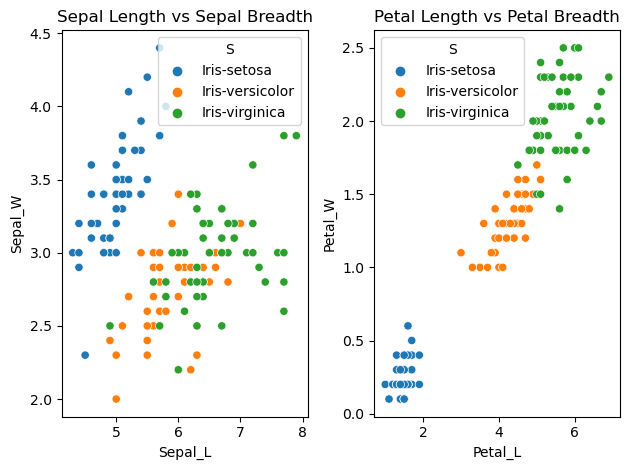

In [9]:
plt.subplot(1,2,1)
sns.scatterplot(data=df , x='Sepal_L', y='Sepal_W', hue = 'S')
plt.title('Sepal Length vs Sepal Breadth')
plt.subplot(1,2,2)
sns.scatterplot(data=df , x='Petal_L', y='Petal_W', hue = 'S')
plt.title('Petal Length vs Petal Breadth')
plt.tight_layout()
plt.show()

### Boxplot:

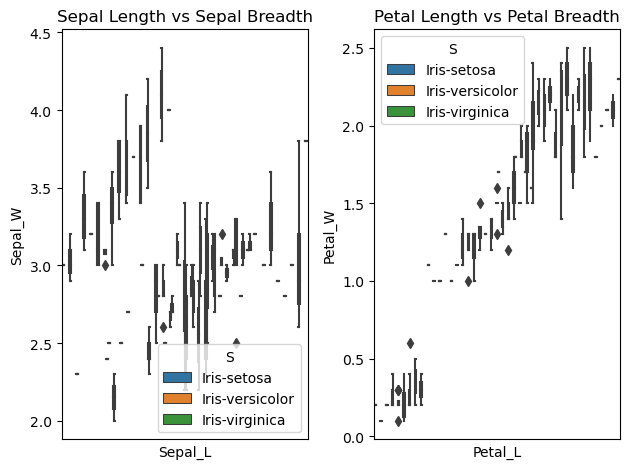

In [10]:
plt.subplot(1,2,1)
sns.boxplot(data=df , x='Sepal_L', y='Sepal_W', hue = 'S')
plt.title('Sepal Length vs Sepal Breadth')
plt.xticks([])
plt.subplot(1,2,2)
sns.boxplot(data=df , x='Petal_L', y='Petal_W', hue = 'S')
plt.title('Petal Length vs Petal Breadth')
plt.xticks([])
plt.tight_layout()
plt.show()

### Jointplot:

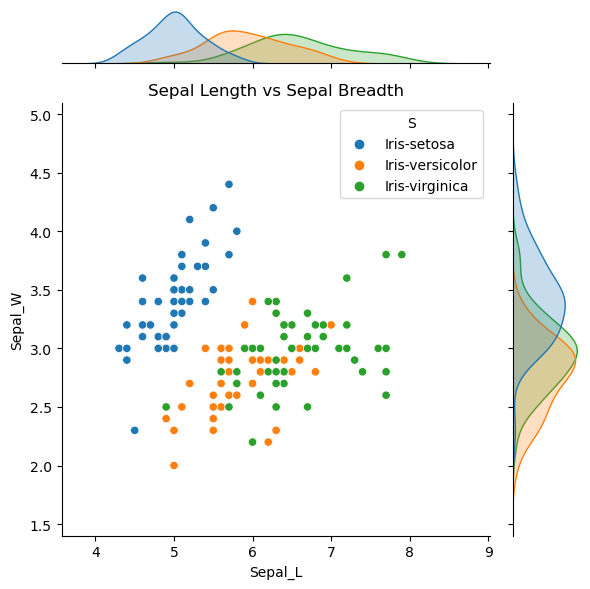

In [11]:

sns.jointplot(data=df , x='Sepal_L', y='Sepal_W', hue = 'S')
plt.title('Sepal Length vs Sepal Breadth')

plt.tight_layout()
plt.show()

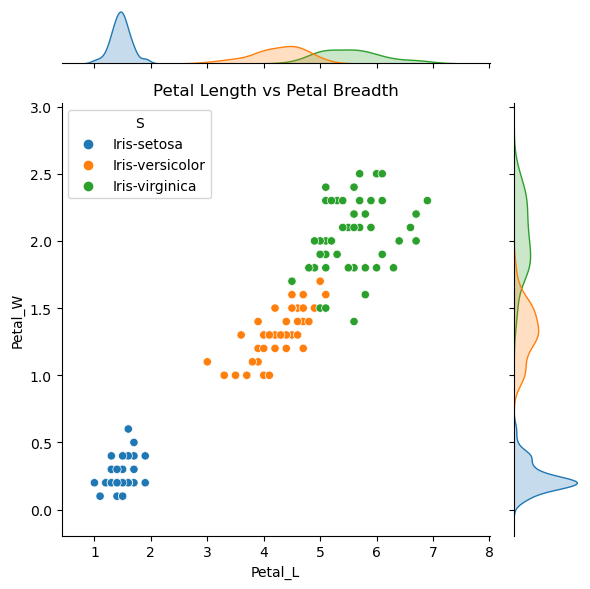

In [12]:
sns.jointplot(data=df , x='Petal_L', y='Petal_W', hue = 'S')
plt.title('Petal Length vs Petal Breadth')

plt.tight_layout()
plt.show()

### Pairplot:

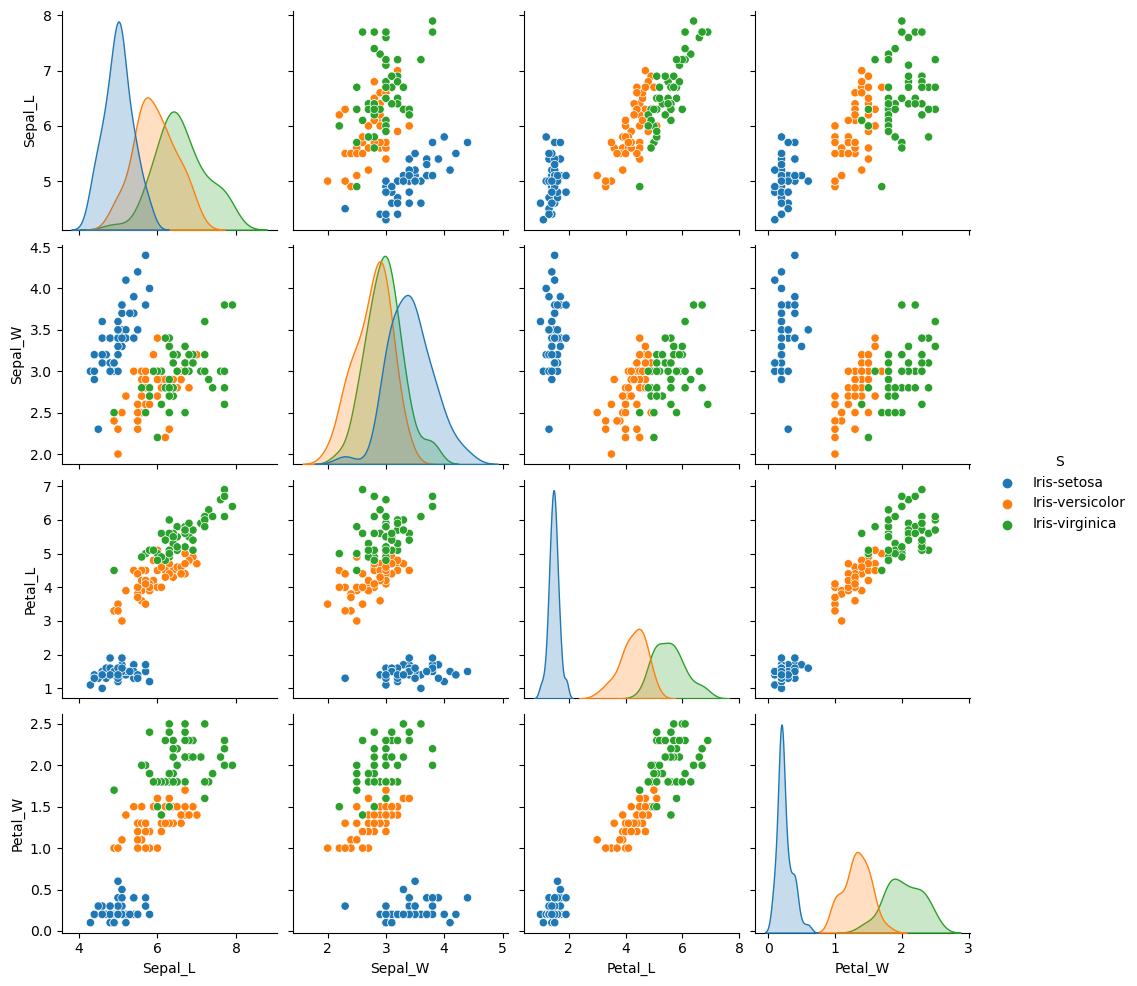

In [13]:
sns.pairplot(data = df,hue = "S")
plt.show()

## Splitting the Data set

In [14]:
from sklearn.model_selection import train_test_split
X= df.drop('S', axis = 1) #to seperate the labelled output during the training of the model
Y=df['S']

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , Y_train)
y_pred=lr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score
accuracy = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print("Accuracy rate: {:.2f}%".format(accuracy * 100))
print("Precision (Weighted): {:.2f}".format(precision))
print("Recall (Weighted): {:.2f}".format(recall))
print("F1 Score (Weighted): {:.2f}".format(f1))

Accuracy rate: 100.00%
Precision (Weighted): 1.00
Recall (Weighted): 1.00
F1 Score (Weighted): 1.00


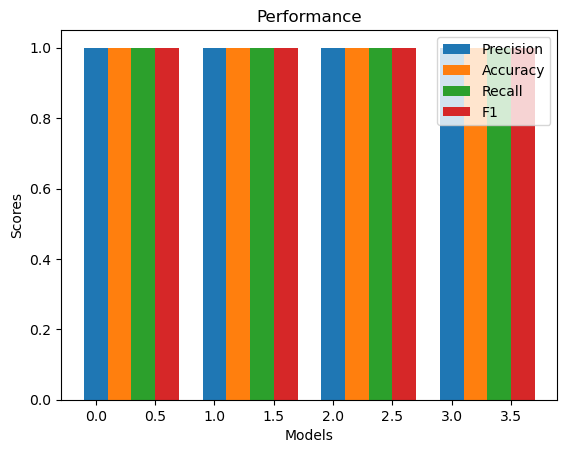

In [24]:
bar_width = 0.2
x = np.arange(4)
plt.bar(x, precision, width=bar_width, label='Precision')
plt.bar(x + bar_width, accuracy, width=bar_width, label='Accuracy')
plt.bar(x + 2*bar_width,recall, width=bar_width, label='Recall')
plt.bar(x + 3*bar_width, f1, width=bar_width, label='F1')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance')

plt.legend()
plt.show()